# Point mutations and image histogram

![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

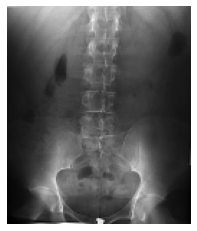

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


<Figure size 720x720 with 0 Axes>

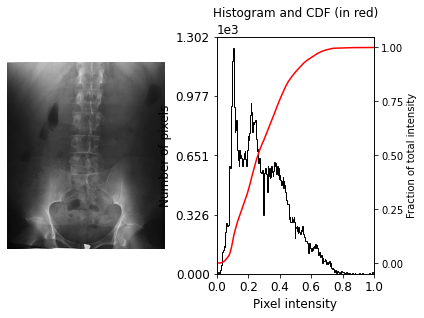

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig, (ax_img, ax_hist) = plt.subplots(ncols = 2)
fig.tight_layout()
matplotlib.rcParams['font.size'] = 10

image = img_as_float(im)
ax_cdf = ax_hist.twinx()

ax_img.imshow(image, cmap=plt.cm.gray)
ax_img.set_axis_off()

ax_hist.hist(image.ravel(), bins=256, histtype='step', color='black')
ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax_hist.set_xlabel('Pixel intensity')
ax_hist.set_xlim(0, 1)
ax_hist.set_yticks([])

img_cdf, bins = exposure.cumulative_distribution(image, 256)
ax_cdf.plot(bins, img_cdf, 'r')
ax_cdf.set_yticks([])

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_hist.set_title('Histogram and CDF (in red)', pad=20)

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))
plt.show()

In [ ]:
def brightness_modification(image= None, c= 0.0):
  """brightness correction of im
     image as numpy array
     image range in 0-1
  """
  image = image + c
  image = np.where(image >1,1, image) #one is the max
  image = np.where(image <0,0, image)
  return image





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


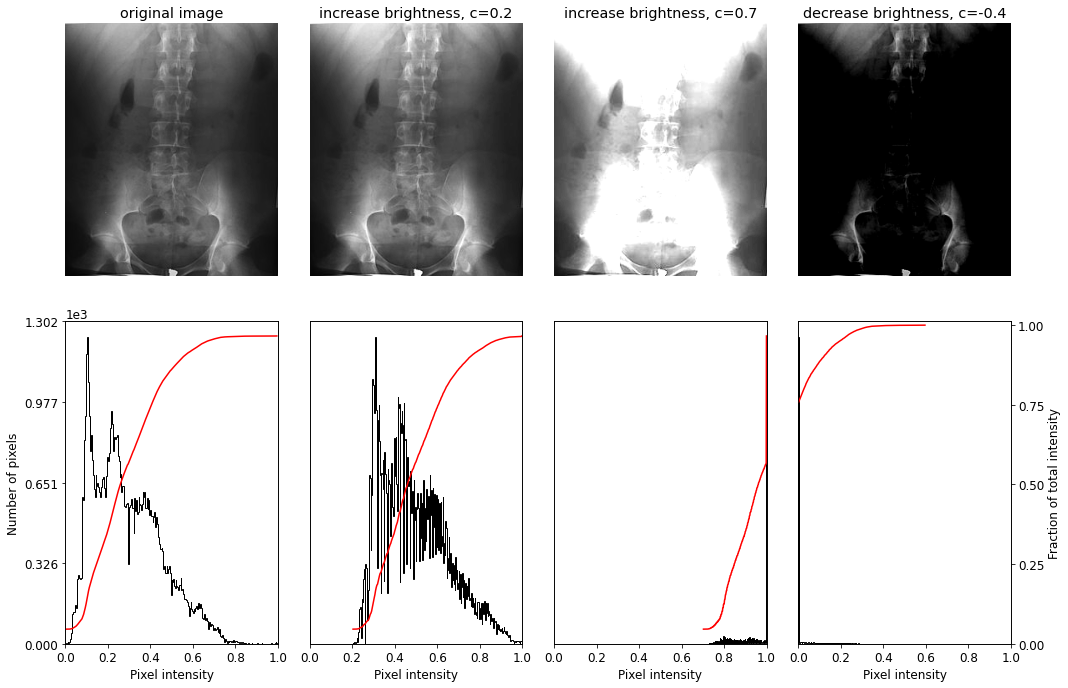

In [ ]:
matplotlib.rcParams['font.size'] = 12
# Load an example image
img = im

# increase brightness
img_br = brightness_modification(image= im, c= 0.2)

# increase brightness a lot
img_br1 = brightness_modification(image= im, c= 0.7)

# decrease brightness
img_br2 = brightness_modification(image= im, c= -0.4)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_br, axes[:, 1])
ax_img.set_title('increase brightness, c=0.2')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_br1, axes[:, 2])
ax_img.set_title('increase brightness, c=0.7')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_br2, axes[:, 3])
ax_img.set_title('decrease brightness, c=-0.4')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [ ]:
def contrast_modification(image= None, c= 0.0):
  """contrast correction of im
     image as numpy array
     image range in 0-1
  """
  image = image * c
  image = np.where(image >1,1, image) #one is the max
  image = np.where(image <0,0, image)
  return image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


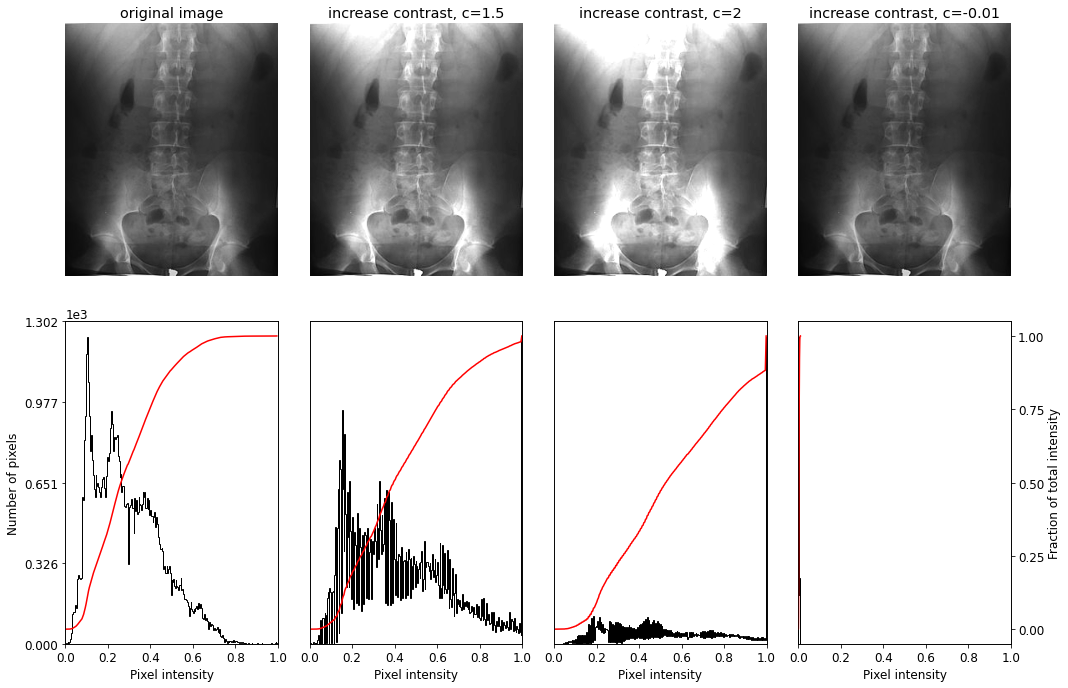

In [ ]:
matplotlib.rcParams['font.size'] = 12
# Load an example image
img = im

# increase contrast
img1 = contrast_modification(image= im, c= 1.5)

# increase contrast a lot
img2 = contrast_modification(image= im, c= 2)

# decrease contrast
img3 = contrast_modification(image= im, c= 0.01)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')
y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img1, axes[:, 1])
ax_img.set_title('increase contrast, c=1.5')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img2, axes[:, 2])
ax_img.set_title('increase contrast, c=2')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img3, axes[:, 3])
ax_img.set_title('increase contrast, c=-0.01')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [ ]:
def linear_mapping(image= None, std= 0.0, mean = 0.0):
  """linear mapping of im
     image as numpy array
     image range in 0-1
  """
  im_mean = np.mean(image)
  im_std = np.std(image)
  image = ((mean/im_mean)*(image -im_std))+std
  image = np.where(image >1,1, image) #one is the max
  image = np.where(image <0,0, image)
  return image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


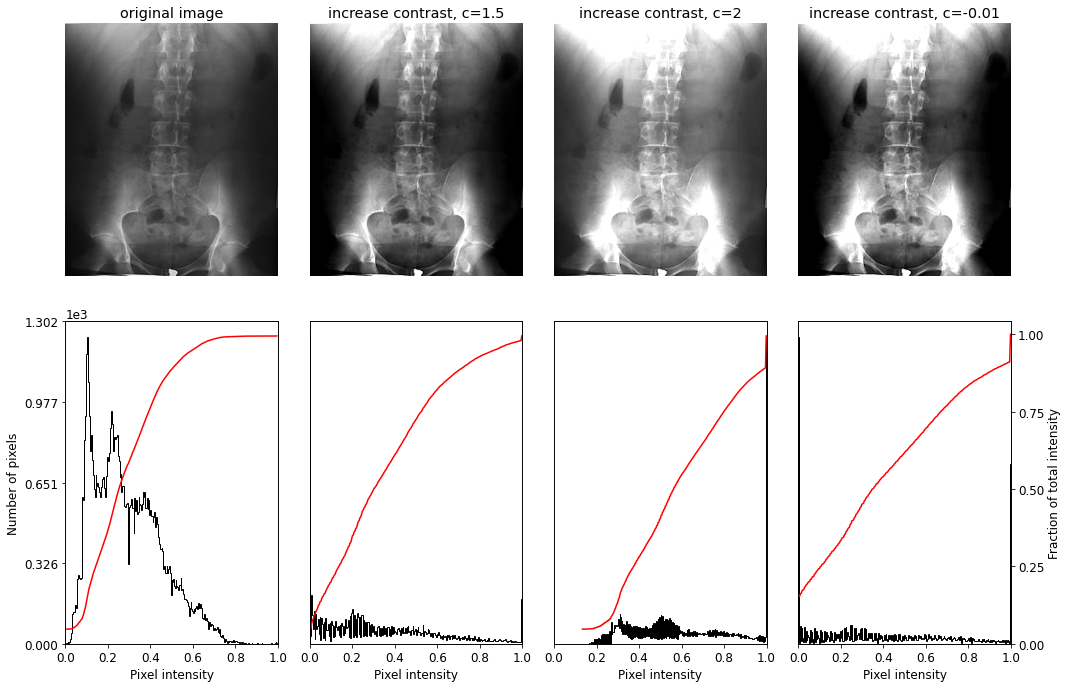

In [ ]:
matplotlib.rcParams['font.size'] = 12
# Load an example image
img = im

# linear mapping
img1 = linear_mapping(image= img, std= 0.1, mean = 0.5)

# linear mapping
img2 = linear_mapping(image= img, std= 0.4, mean = 0.5)

# linear mapping
img3 = linear_mapping(image= img, std= 0.1, mean = 0.7)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')
y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img1, axes[:, 1])
ax_img.set_title('linear mapping, std= 0.1, mean = 0.5')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img2, axes[:, 2])
ax_img.set_title('linear mapping, std= 0.3, mean = 0.5')
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img3, axes[:, 3])
ax_img.set_title('linear mapping, std= 0.1, mean = 0.7')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


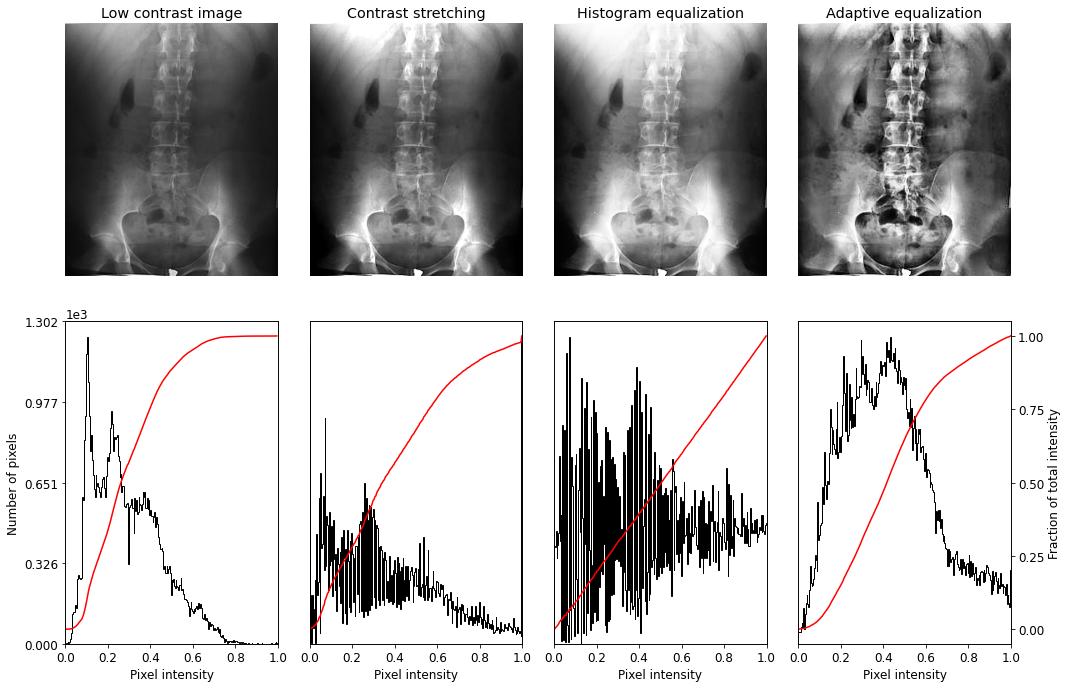

In [ ]:
from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 12
# Load an example image
img = im

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


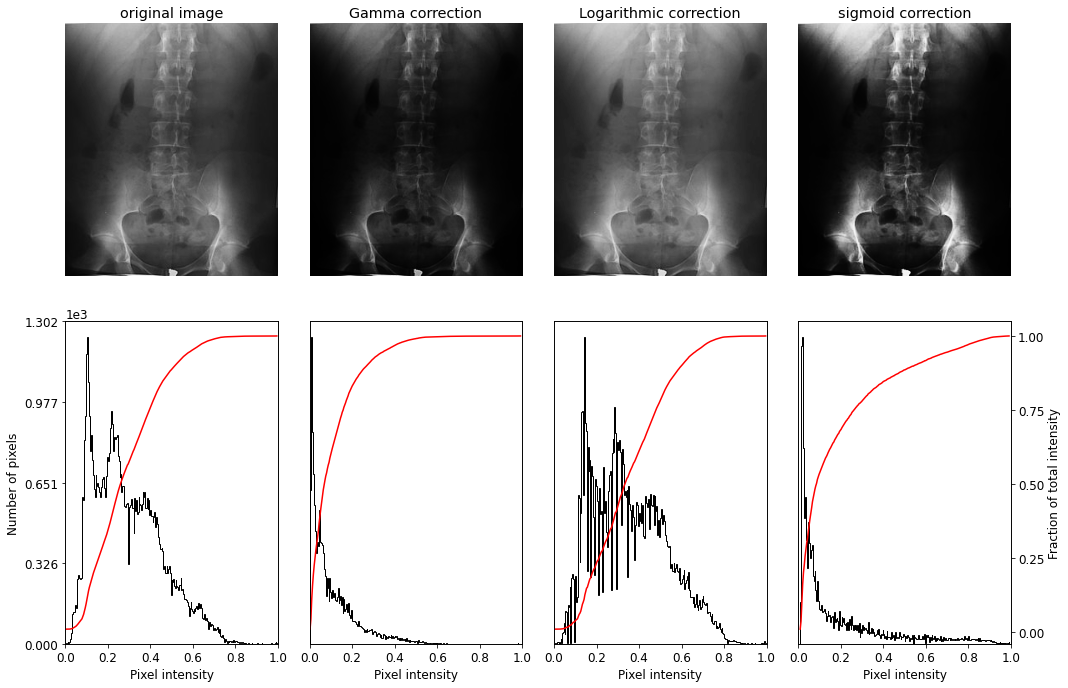

In [ ]:
matplotlib.rcParams['font.size'] = 12

# Load an example image
img = im

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)
# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# sigmoid
sigmoid_cor = exposure.adjust_sigmoid(img)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(sigmoid_cor, axes[:, 3])
ax_img.set_title('sigmoid correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()